In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

In [2]:
cols=['#1FC178','#78FECF','#555B6E','#CC998D','#429EA6','#FC3F16', '#FCEE16', '#74FC16', '#09983B', '#C608CF', '#F658D9', '#973365', '#0719F7', '#33789B', '#0DD857']

### Dataset creation and preprocessing

In [3]:
x,y= make_blobs(n_features=50, centers=15, n_samples=15000, cluster_std=0.2, center_box=[-1,1], random_state=17)

In [4]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.1, random_state=17)

scalar= MinMaxScaler()
x_train= scalar.fit_transform(x_train)
x_test= scalar.fit_transform(x_test)

### Baseline Model Prediction

In [5]:
pca= PCA(n_components=2)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

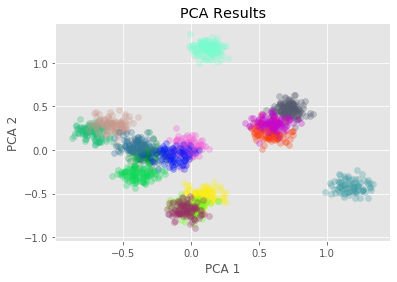

In [6]:
res_pca= pca.transform(x_test)

unique_labels= np.unique(y_test)
for index, unique_label in enumerate(unique_labels):
    x_data= res_pca[y_test==unique_label]
    
    #Visulaizing the point clusters
    plt.scatter(x_data[:,0], x_data[:,1], alpha=0.3, c= cols[index])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Results')
plt.show()

### Autoencoder Training

In [7]:
autoencoder= MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50,100,50,2,50,100,50), random_state=1, max_iter=5000)
autoencoder.fit(x_train, x_train)

MLPRegressor(activation='relu', alpha=1e-15, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=5000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
             solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

### Reducing Dimensionality

In [8]:
W= autoencoder.coefs_
b= autoencoder.intercepts_

for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [9]:
encoder_weights= W[:4]
encoder_biases= b[:4]

In [10]:
def encode(encoder_weights, encoder_biases, data):
    for index, (w,b) in enumerate(zip(encoder_weights, encoder_biases)):
        if (index+1)==len(encoder_weights):
            data= data@w+b       # @ is a short way to do dot product in numpy 
        else:
            data= np.maximum(0, data@w+b)
    
    return data

res_ae= encode(encoder_weights, encoder_biases, x_test)

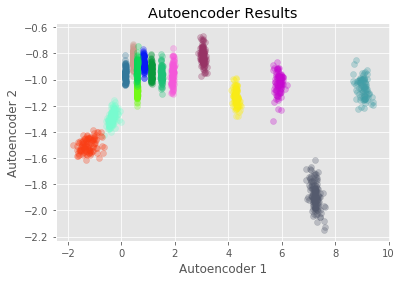

In [11]:
unique_labels= np.unique(y_test)
for index, unique_label in enumerate(unique_labels):
    x_data= res_ae[y_test==unique_label]
    
    #Visulaizing the point clusters
    plt.scatter(x_data[:,0], x_data[:,1], alpha=0.3, c= cols[index])

plt.xlabel('Autoencoder 1')
plt.ylabel('Autoencoder 2')
plt.title('Autoencoder Results')
plt.show()

### Silhouette Score

In [12]:
print('Silhouette Score of Data', silhouette_score(x_test, y_test))
print('Silhouette Score of PCA', silhouette_score(res_pca, y_test))
print('Silhouette Score of Autoencoder', silhouette_score(res_ae, y_test))

Silhouette Score of Data 0.6332683422026048
Silhouette Score of PCA 0.3215094695412921
Silhouette Score of Autoencoder 0.7796225510281032
